In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

In [3]:
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (11, 8), 
        "axes.titlesize": 18 
    }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

In [4]:
df = pd.read_csv('./mlbootcamp5_train.csv')
print('Dataset size: ', df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df["gender"].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [11]:
df[df["gender"] == 1]["height"].median()

161.0

In [12]:
df[df["gender"] == 2]["height"].median()

170.0

As gender 2 has a higher median height, we conclude that:
- 1 -> female
- 2 -> male

Thus there are 45530 women and 24470 men

In [13]:
df[["gender", "alco"]][df["alco"] == 1][["gender"]].value_counts()

gender
2         2603
1         1161
dtype: int64

Thus, men drink more

In [14]:
df[["gender", "smoke"]][df["smoke"] == 1][["gender"]].value_counts()

gender
2         5356
1          813
dtype: int64

Thus, mean smoke more on average

In [10]:
100 * (df.loc[df["gender"] == 2, "smoke"].mean()
        - df.loc[df["gender"] == 1, "smoke"].mean()
)

20.102390309976737

In [12]:
df[["age"]]/365.25

,age
0,50.357290
1,55.381246
2,51.627652
3,48.249144
4,47.841205
...,...
69995,52.676249
69996,61.878166
69997,52.199863
69998,61.412731


Thus the age is in days, divide by 365.25 to get age in years

In [15]:
df.groupby("smoke")["age"].median()/365.25

smoke
0    53.995893
1    52.361396
Name: age, dtype: float64

In [24]:
diff = df[df["smoke"] == 0]["age"].median() - df[df["smoke"] == 1]["age"].median()
if diff > 0:
    print(f"non-smokers median age is around {round(12*(diff/365.25))} months higher than smokers")
else:
    print(f"smokers median age is around {round(12*(-1*diff/365.25))} months higher than non-smokers")

non-smokers median age is around 20 months higher than smokers


In [17]:
df["age_years"] = round(df["age"]/365.25).astype(int)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,53
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,62
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61


In [18]:
data = df[(df["gender"] == 2) & (df["age_years"] >= 60) & (df["age_years"] < 65) & (df["smoke"] == 1)]
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
19,29,21755,2,162,56.0,120,70,1,1,1,0,1,0,60
38,52,23388,2,162,72.0,130,80,1,1,1,0,1,1,64
67,90,22099,2,171,97.0,150,100,3,1,1,0,1,1,61
177,240,21848,2,170,69.0,120,80,1,1,1,1,1,0,60
182,248,22671,2,174,74.0,130,80,3,1,1,0,1,1,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69697,99551,23224,2,151,45.0,120,70,3,1,1,1,0,1,64
69699,99553,23183,2,178,113.0,130,90,2,2,1,0,1,1,63
69814,99711,22759,2,167,76.0,120,80,1,1,1,0,1,0,62
69857,99775,22637,2,177,63.0,150,70,1,1,1,0,1,1,62


In [19]:
data[(data["cholesterol"] == 1) & (data["ap_hi"] < 120)]["cardio"].value_counts()

0    56
1    20
Name: cardio, dtype: int64

In [44]:
var2 = data[(data["cholesterol"] == 1) & (data["ap_hi"] < 120)]["cardio"].mean()*100
var2

26.31578947368421

In [20]:
data[(data["cholesterol"] == 3) & (data["ap_hi"] >= 160)& (data["ap_hi"] < 180)]["cardio"].value_counts()

1    19
0     3
Name: cardio, dtype: int64

In [43]:
var1 = data[(data["cholesterol"] == 3) & (data["ap_hi"] >= 160)& (data["ap_hi"] < 180)]["cardio"].mean()*100
var1

86.36363636363636

In [47]:
print(f"Ratio is around {round(var1/var2)} fold")

Ratio is around 3 fold


In [68]:
df["BMI"] = df["weight"] / (df["height"] / 100) ** 2

In [49]:
df["BMI"].median()

26.374068120774975

In [56]:
print(f'Women BMI av: {df[df["gender"] == 1]["BMI"].mean()}\n\
Men BMI av: {df[df["gender"] == 2]["BMI"].mean()}')

Women BMI av: 27.98758344183285
Men BMI av: 26.754442357289356


Thus, women's BMI is higher on average than men's

In [58]:
print(f'Healthy BMI median: {df[df["cardio"] == 0]["BMI"].median()}\n\
Ill BMI median: {df[df["cardio"] == 1]["BMI"].median()}')

Healthy BMI median: 25.476660092044707
Ill BMI median: 27.47138397502601


Thus, unhealthy people have a higher median BMI 

In [60]:
pd.DataFrame(df.groupby(["gender", "alco", "cardio"])["BMI"].median())

BMI
gender alco cardio           
1      0    0       25.654372
            1       27.885187
       1    0       27.885187
            1       30.110991
2      0    0       25.102391
            1       26.674874
       1    0       25.351541
            1       27.530797

Thus, in the group of healthy and non-drinking men BMI is closer to the norm than in the group of healthy and non-drinking women

In [69]:
clean_df = df.drop(df[
    (df["ap_lo"] > df["ap_hi"])
    | (df["height"] < df["height"].quantile(0.025))
    | (df["height"] > df["height"].quantile(0.975))
    | (df["weight"] < df["weight"].quantile(0.025))
    | (df["weight"] > df["weight"].quantile(0.975))
].index)

In [70]:
clean_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1,54,23.661439
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1,58,29.384757
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,53,26.927438
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251


<AxesSubplot:>

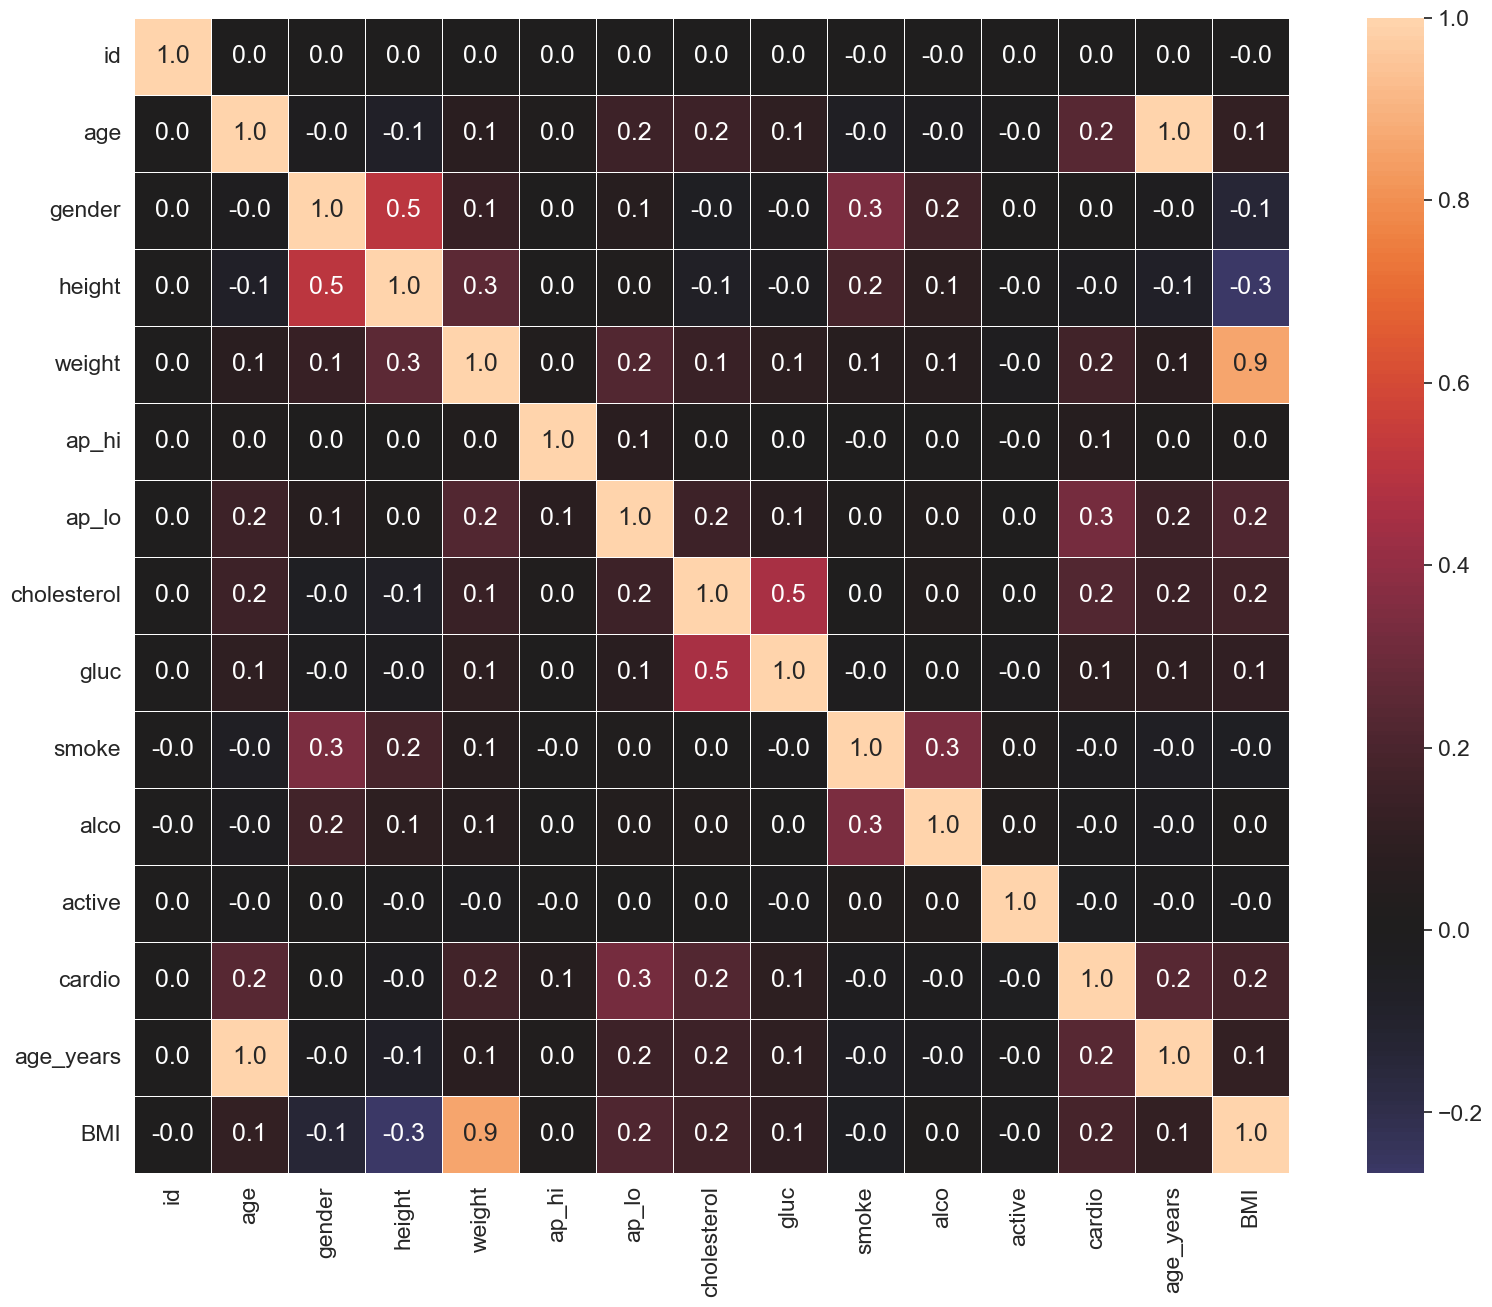

In [121]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(20, 15))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".1f",
    square=True,
    linewidths=0.5,
    center=0
)

Thus, height and smoking have the highest pearson correlation with gender

In [90]:
melted = pd.melt(df, value_vars=["height"], id_vars=["gender"])
melted

,gender,variable,value
0,2,height,168
1,1,height,156
2,1,height,165
3,2,height,169
4,1,height,156
...,...,...,...
69995,2,height,168
69996,1,height,158
69997,2,height,183
69998,1,height,163


<AxesSubplot:xlabel='variable', ylabel='value'>

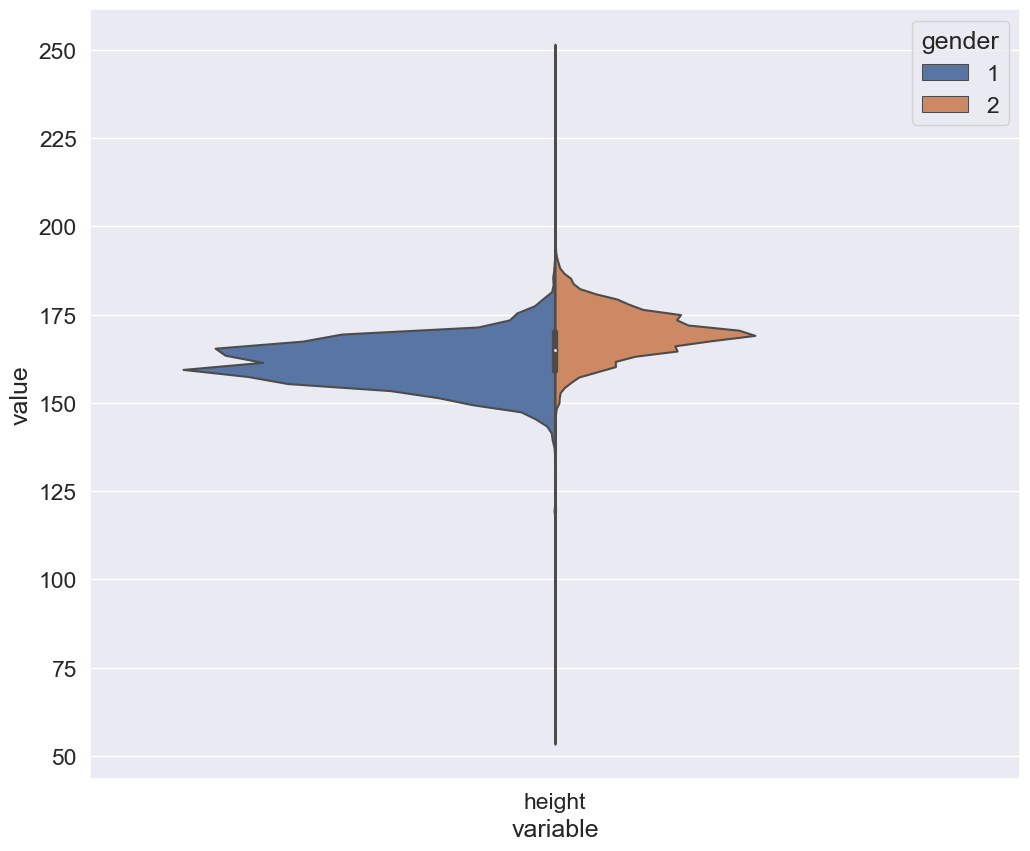

In [95]:
plt.figure(figsize=(12, 10))
sns.violinplot(x="variable", y="value", hue="gender", data=melted, split=True, scale="count",)

In [96]:
df = clean_df

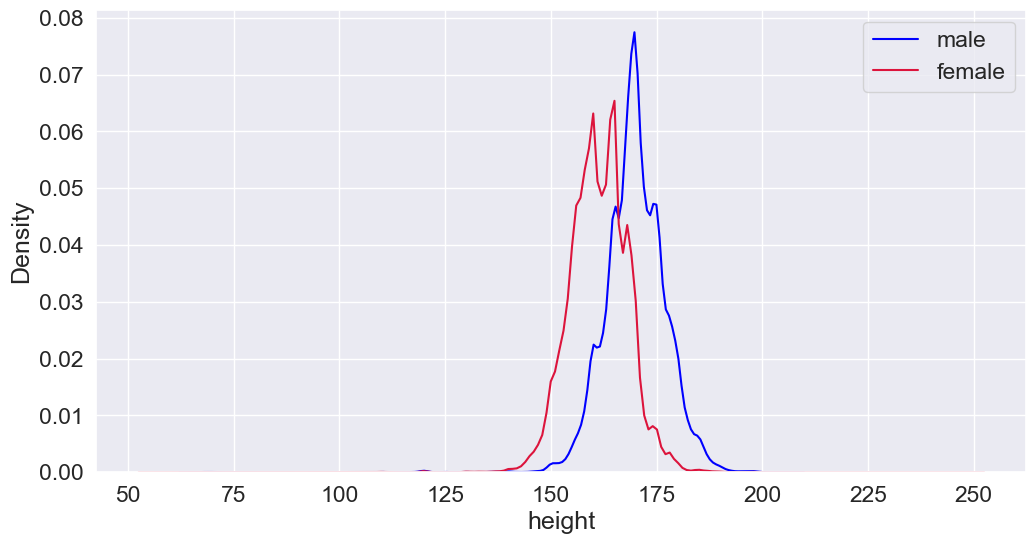

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))
female = df[df["gender"] == 1][["height"]].squeeze(1)
male = df[df["gender"] == 2][["height"]].squeeze(1)
sns.kdeplot(male, color='blue', label="male", ax = ax)
sns.kdeplot(female, color='crimson', label="female", ax= ax)
ax.legend()

<AxesSubplot:>

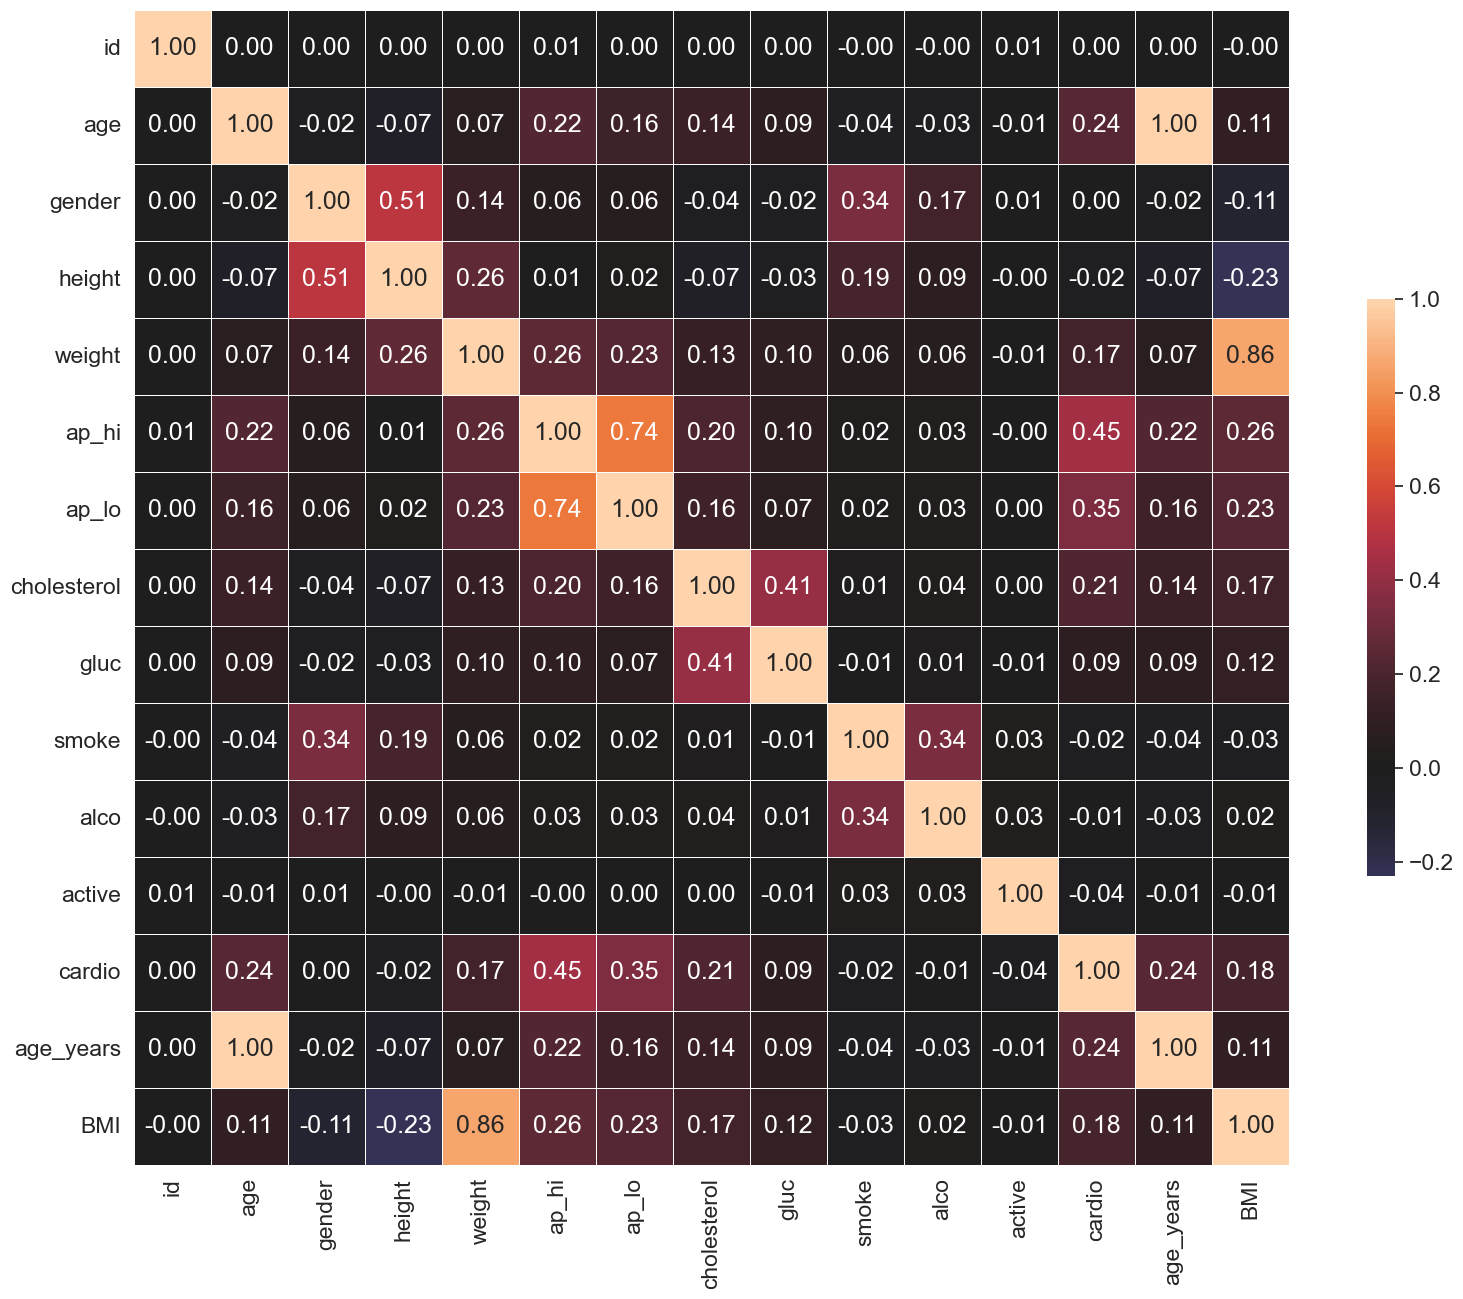

In [120]:
corr_matrix = df.corr(method="spearman")

f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    center=0,
    cbar_kws={"shrink": 0.5},
)

Thus, Ap_hi and Ap_low have the highest spearman correlation because of the nature of the features and data

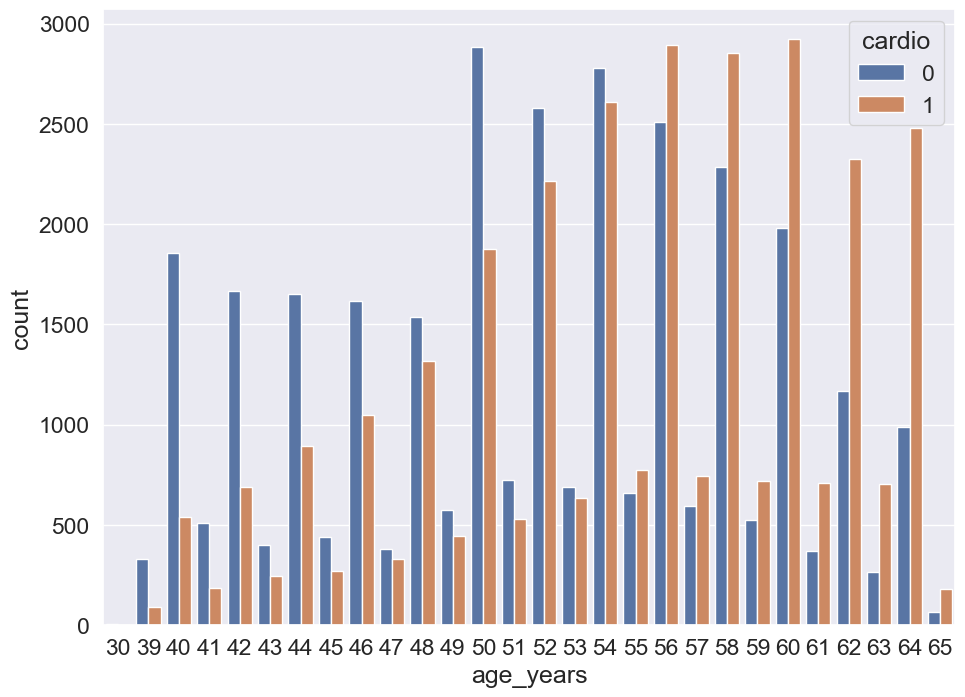

In [122]:
sns.countplot(x="age_years", hue="cardio", data=df)

55 is the lowest age at which people with cvd outnumber healthy people